In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- SETUP VISUAL ---
PALETA = {
    'arabica': '#02A556',
    'robusta': '#CC2229', # Adicionamos o vermelho do Robusta
    'dolar':   '#0393BD',
    'texto':   '#022B49',
    'grid':    '#B0BEC5'
}

In [3]:
# --- CARGA DOS DADOS ---
df = pd.read_parquet('../data/processed/dados_completos_commodities.parquet')

# --- ANÁLISE 1: CORRELAÇÃO DÓLAR x CAFÉS ---
# Pergunta 8: O Dólar puxa o preço de qual café com mais força?
corr_arabica = df[['Dolar', 'Arabica_BRL']].corr().iloc[0, 1]
corr_robusta = df[['Dolar', 'Robusta_BRL']].corr().iloc[0, 1]

print(f"--- Correlação Dólar x Arábica: {corr_arabica:.2f}")
print(f"--- Correlação Dólar x Robusta: {corr_robusta:.2f}")

# Veredito automático
if abs(corr_arabica - corr_robusta) < 0.1:
    print("Veredito: O Dólar afeta ambos praticamente da mesma forma.")
else:
    print("Veredito: O Dólar tem impacto diferente em cada espécie.")

--- Correlação Dólar x Arábica: 0.63
--- Correlação Dólar x Robusta: 0.62
Veredito: O Dólar afeta ambos praticamente da mesma forma.


Gráfico Macro salvo!


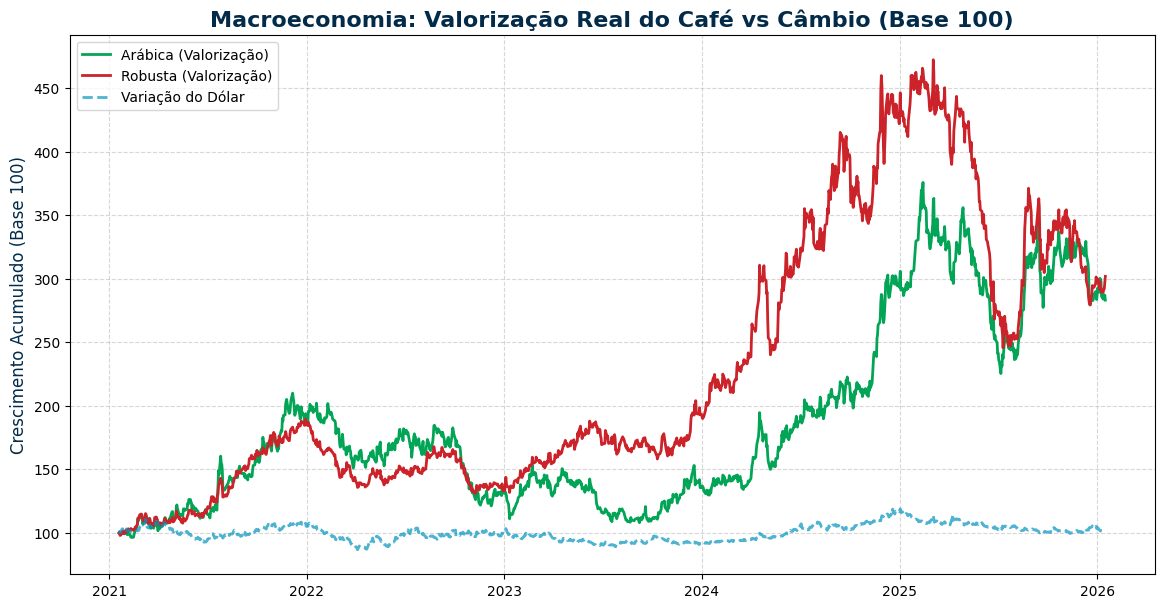

In [4]:
# --- ANÁLISE 2: CORRIDA DE VALORIZAÇÃO (BASE 100) ---
# Normalizando tudo para começar em 100 no primeiro dia
df['Dolar_Norm']   = (df['Dolar'] / df['Dolar'].iloc[0]) * 100
df['Arabica_Norm'] = (df['Arabica_BRL'] / df['Arabica_BRL'].iloc[0]) * 100
df['Robusta_Norm'] = (df['Robusta_BRL'] / df['Robusta_BRL'].iloc[0]) * 100

plt.figure(figsize=(14, 7))

# 1. Plot do Arábica (Verde)
plt.plot(df['Date'], df['Arabica_Norm'], 
         label='Arábica (Valorização)', color=PALETA['arabica'], linewidth=2)

# 2. Plot do Robusta (Vermelho)
plt.plot(df['Date'], df['Robusta_Norm'], 
         label='Robusta (Valorização)', color=PALETA['robusta'], linewidth=2)

# 3. Plot do Dólar (Azul Tracejado)
plt.plot(df['Date'], df['Dolar_Norm'], 
         label='Variação do Dólar', color=PALETA['dolar'], linewidth=2, linestyle='--', alpha=0.7)

# Decoração
plt.title('Macroeconomia: Valorização Real do Café vs Câmbio (Base 100)', fontsize=16, fontweight='bold', color=PALETA['texto'])
plt.ylabel('Crescimento Acumulado (Base 100)', fontsize=12, color=PALETA['texto'])
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.savefig('../img/fig06_macroeconomia.png', dpi=300, bbox_inches='tight')
print("Gráfico Macro salvo!")

plt.show()